In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [ ]:
dataset = '/content/keypoint.csv'
model_save_path = '/content/keypoint_classifier.hdf5'

In [ ]:
NUM_CLASSES = 9

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 30)                1290      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                520       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=10000,
    batch_size=128,
    validation_data=(X_test, y_test),
    # callbacks=[cp_callback, es_callback]
)

Streaming output truncated to the last 5000 lines.
52/52 [==============================] - 0s 7ms/step - loss: 0.4570 - accuracy: 0.8460 - val_loss: 0.2911 - val_accuracy: 0.9010
Epoch 7502/10000
52/52 [==============================] - 0s 7ms/step - loss: 0.4243 - accuracy: 0.8485 - val_loss: 0.2866 - val_accuracy: 0.9042
Epoch 7503/10000
52/52 [==============================] - 0s 7ms/step - loss: 0.4439 - accuracy: 0.8465 - val_loss: 0.3085 - val_accuracy: 0.9015
Epoch 7504/10000
52/52 [==============================] - 0s 7ms/step - loss: 0.4320 - accuracy: 0.8523 - val_loss: 0.3217 - val_accuracy: 0.8937
Epoch 7505/10000
52/52 [==============================] - 0s 7ms/step - loss: 0.4556 - accuracy: 0.8407 - val_loss: 0.3200 - val_accuracy: 0.8878
Epoch 7506/10000
52/52 [==============================] - 0s 9ms/step - loss: 0.4225 - accuracy: 0.8515 - val_loss: 0.3190 - val_accuracy: 0.8841
Epoch 7507/10000
52/52 [==============================] - 0s 9ms/step - loss: 0.4358 - acc

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

18/18 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.8901


In [ ]:
print(model.history.history)

{}


In [ ]:
# Visualize training results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


In [ ]:
model = tf.keras.models.load_model(model_save_path)

In [ ]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 18ms/step
[5.6910587e-10 2.5176383e-18 6.4642969e-13 2.9178700e-01 1.2939603e-08
 1.3697053e-09 7.0821285e-01 5.3974077e-08 1.0866005e-07]
6


69/69 [==============================] - 0s 1ms/step


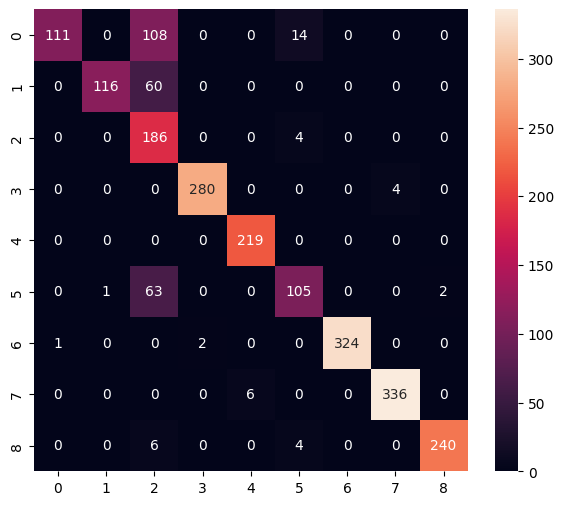

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.48      0.64       233
           1       0.99      0.66      0.79       176
           2       0.44      0.98      0.61       190
           3       0.99      0.99      0.99       284
           4       0.97      1.00      0.99       219
           5       0.83      0.61      0.70       171
           6       1.00      0.99      1.00       327
           7       0.99      0.98      0.99       342
           8       0.99      0.96      0.98       250

    accuracy                           0.87      2192
   macro avg       0.91      0.85      0.85      2192
weighted avg       0.93      0.87      0.88      2192



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tflite_save_path = '/content/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6764

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.69106706e-10 2.51764724e-18 6.46429416e-13 2.91787177e-01
 1.29396485e-08 1.36970746e-09 7.08212674e-01 5.39742651e-08
 1.08659918e-07]
6


In [ ]:
datagen = ImageGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='reflect'
)

dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
  if (image_name.split('.')[1] == 'png'):
    image = io.imread(image_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    dataset.append(np.array(image))